En este archivo vamos a sacar varias gráficas estadísticas de posible interés relacionadas con los datos extraidos limpios de limpieza.py

Primero cargamos las librerias necesarias

In [1]:
#cargar csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos los archivos

In [46]:
#cargar csv
df2017 = pd.read_csv('data/champions-league-2017-CentralEuropeanStandardTime.csv')
df2018 = pd.read_csv('data/champions-league-2018-WEuropeStandardTime.csv')
df2019 = pd.read_csv('data/champions-league-2019-WEuropeStandardTime.csv')
df2020 = pd.read_csv('data/champions-league-2020-UTC.csv')
df2021 = pd.read_csv('data/champions-league-2021-UTC.csv')
df2022 = pd.read_csv('data/champions-league-2022-UTC.csv')
wins = pd.read_csv('data/wins.csv')
uefa_ranking = pd.read_csv('data/UEFA_Ranking.csv')
equipos_goles = pd.read_csv('data/equipos-goles.csv')
victorias = pd.read_csv('data/victorias.csv')

Gráfica de puntos UEFA

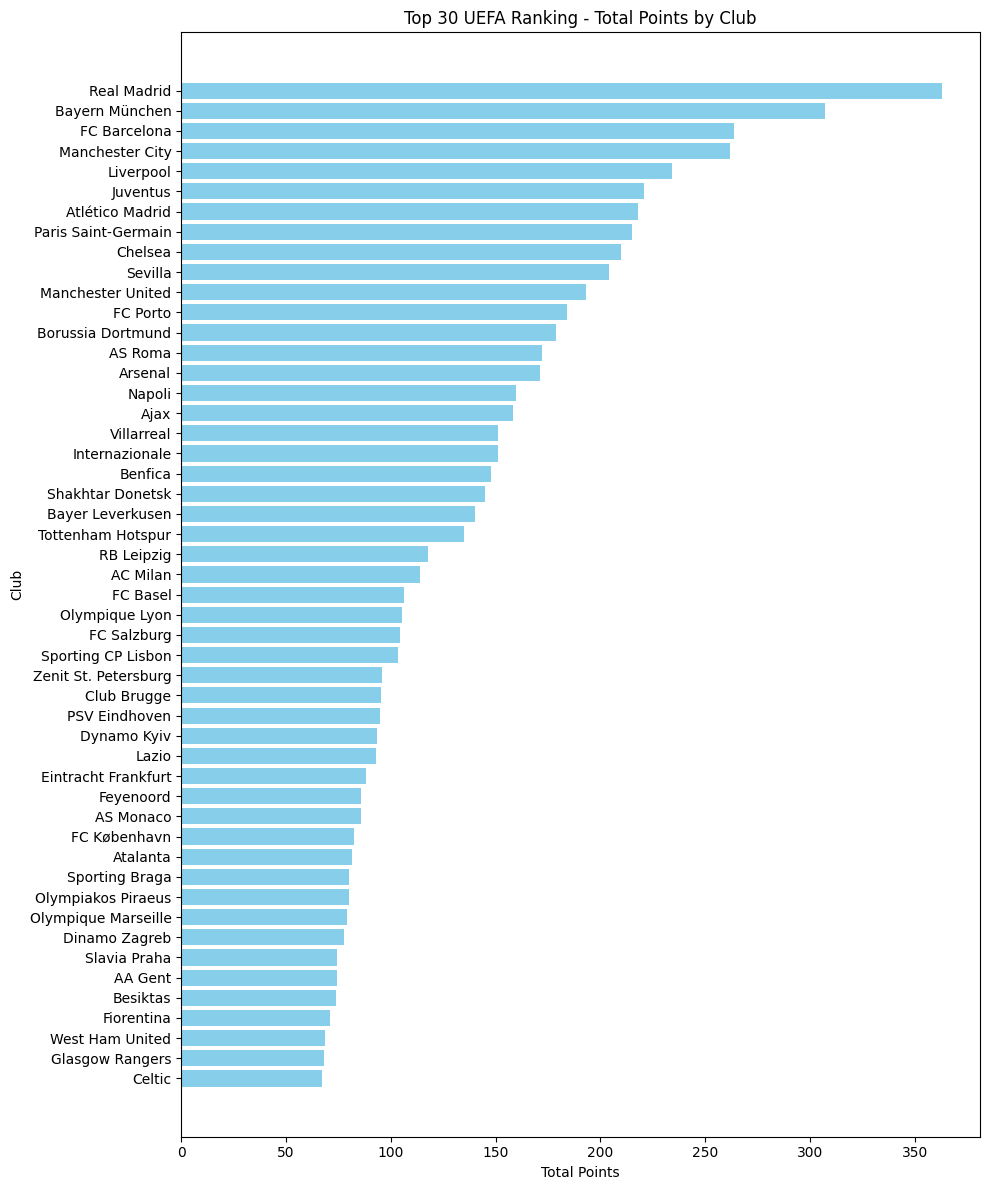

In [47]:
#ordenar uefa ranking de mayor a menor
uefa_ranking = uefa_ranking.sort_values(by='Total Points', ascending=False)

# Seleccionar las columnas necesarias para la gráfica y las primeras 50 filas
df_plot = uefa_ranking[['Club', 'Total Points']].head(50)

# Ordenar los datos por puntos totales
df_plot = df_plot.sort_values(by='Total Points', ascending=True)

# Graficar los datos
plt.figure(figsize=(10, 12))
plt.barh(df_plot['Club'], df_plot['Total Points'], color='skyblue')
plt.xlabel('Total Points')
plt.ylabel('Club')
plt.title('Top 30 UEFA Ranking - Total Points by Club')
plt.tight_layout()
plt.show()

Gráfico de secciones. Porcentaje de equipos con puntuacion mayor a 300, 200, 100

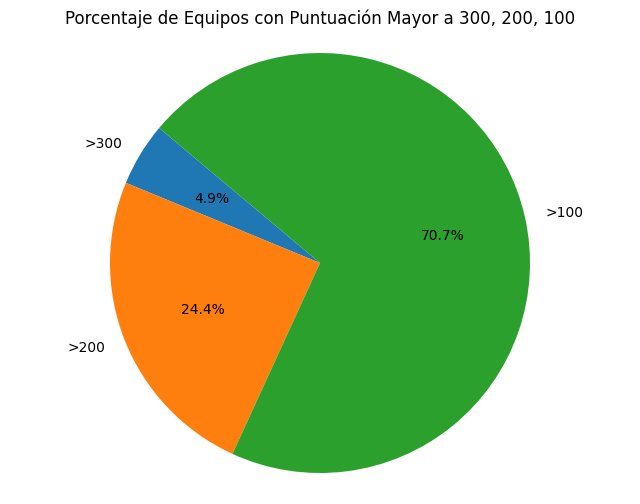

In [48]:
# Calcular el porcentaje de equipos con una puntuación mayor a 300, 200 y 100
total_equipos = len(uefa_ranking)
puntos_mayores_300 = len(uefa_ranking[uefa_ranking['Total Points'] > 300]) / total_equipos * 100
puntos_mayores_200 = len(uefa_ranking[uefa_ranking['Total Points'] > 200]) / total_equipos * 100
puntos_mayores_100 = len(uefa_ranking[uefa_ranking['Total Points'] > 100]) / total_equipos * 100

# Crear los datos para el gráfico
porcentajes = [puntos_mayores_300, puntos_mayores_200, puntos_mayores_100]
labels = ['>300', '>200', '>100']

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(porcentajes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Equipos con Puntuación Mayor a 300, 200, 100')
plt.axis('equal')  # Ajustar el gráfico para que sea un círculo
plt.show()

Número de Champions ganadas

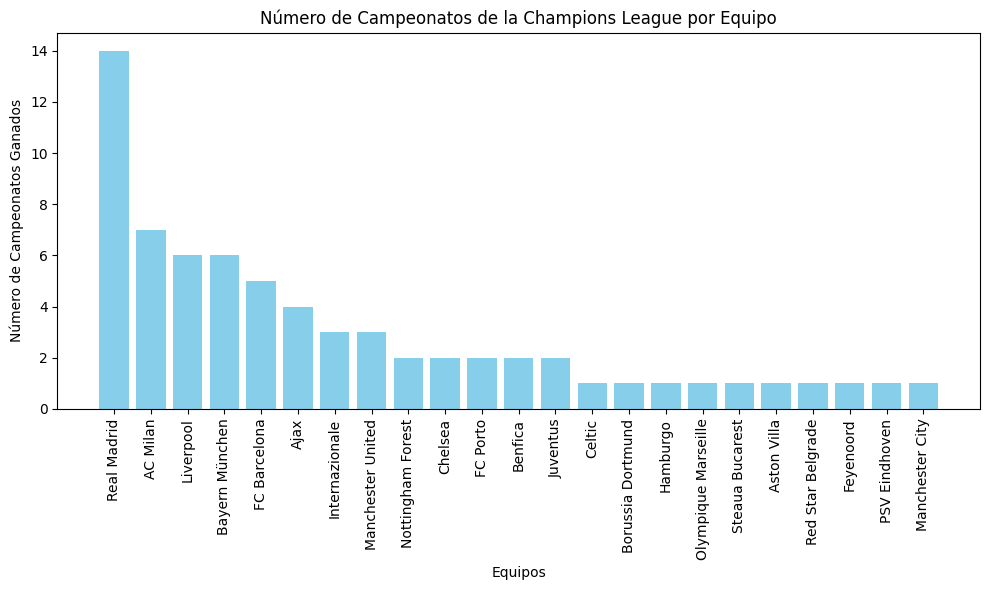

In [49]:
# Ordenar los datos por número de campeonatos ganados
df_wins_sorted = wins.sort_values(by='Champions', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_wins_sorted['Equipo'], df_wins_sorted['Champions'], color='skyblue')
plt.xlabel('Equipos')
plt.ylabel('Número de Campeonatos Ganados')
plt.title('Número de Campeonatos de la Champions League por Equipo')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()
plt.show()

Relación entre Champions Ganadas y Goles Totales

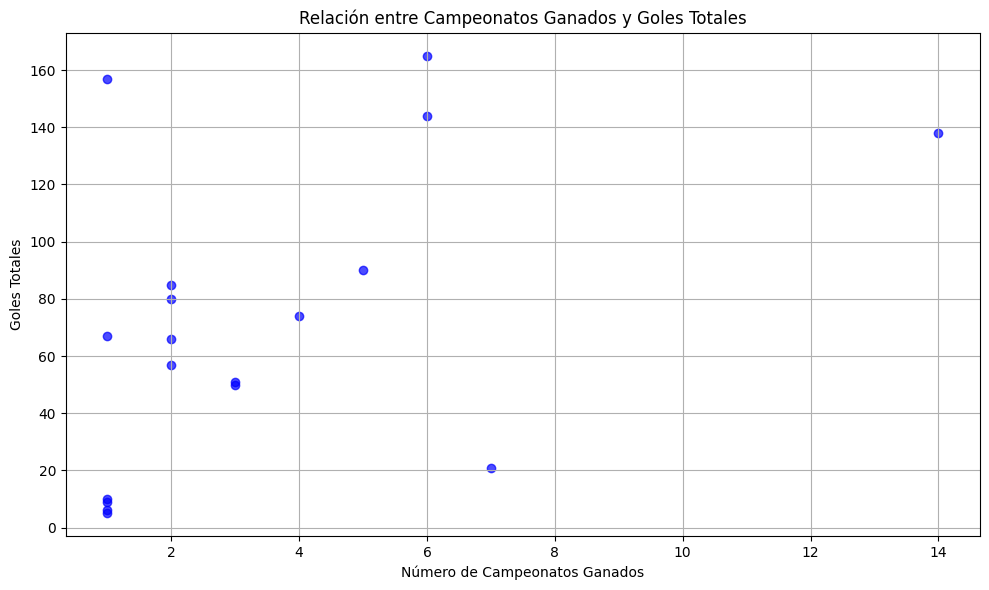

In [50]:

# Unir los DataFrames en base a la columna 'Equipo'
df_merged = pd.merge(wins, equipos_goles, on='Equipo', how='left')

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Champions'], df_merged['Goles'], color='blue', alpha=0.7)
plt.xlabel('Número de Campeonatos Ganados')
plt.ylabel('Goles Totales')
plt.title('Relación entre Campeonatos Ganados y Goles Totales')
plt.grid(True)
plt.tight_layout()
plt.show()

Victorias de partidos en los últimos 7 años

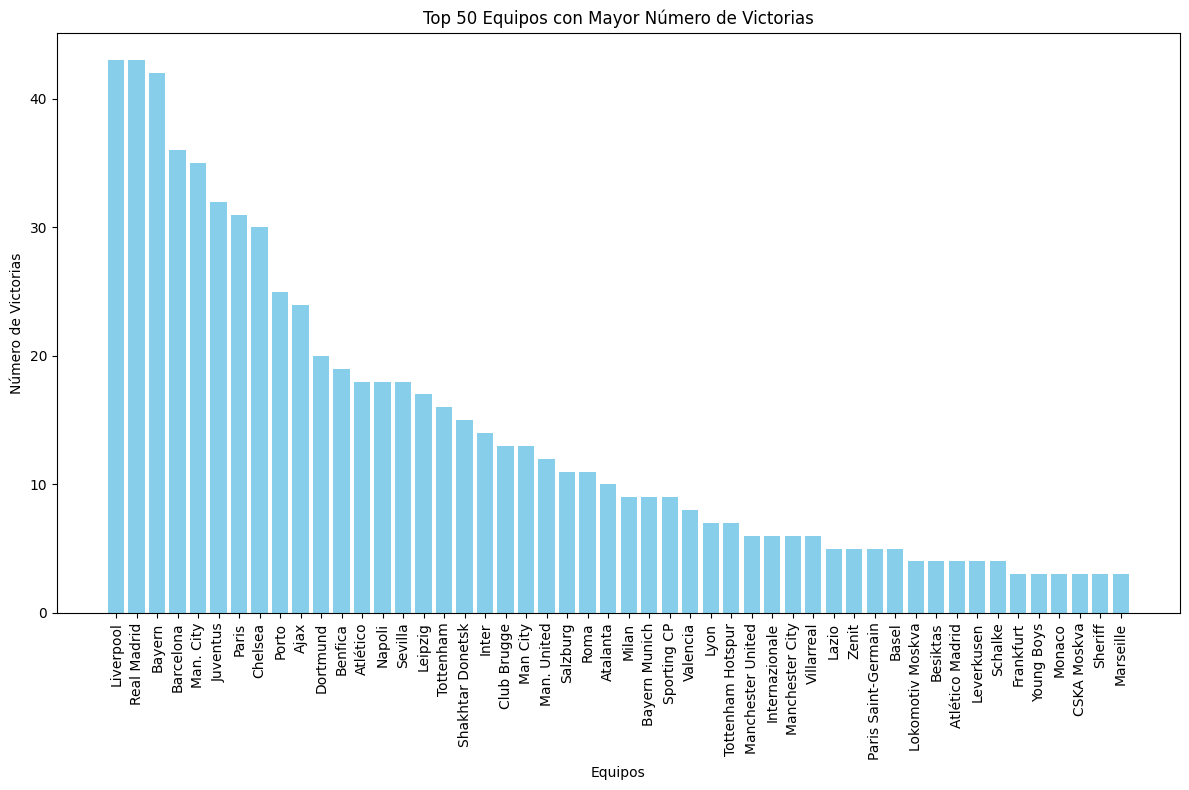

In [51]:
# Ordenar el DataFrame por el número de victorias en orden descendente
df_victorias_sorted = victorias.sort_values(by='Victorias', ascending=False)

# Tomar los primeros 50 equipos
df_top_50 = df_victorias_sorted.head(50)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df_top_50['Equipo'], df_top_50['Victorias'], color='skyblue')
plt.xlabel('Equipos')
plt.ylabel('Número de Victorias')
plt.title('Top 50 Equipos con Mayor Número de Victorias')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()
plt.show()